<hr>
<h1>BMI</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dprocessing as dp
%matplotlib inline

In [2]:
from jupyterthemes import jtplot
jtplot.style() #sns.set()

In [3]:
with open('polish_female_firstnames.txt', 'r', encoding = "utf8") as file:
    female = file.readlines()

In [4]:
female

['Maria\n',
 'Krystyna\n',
 'Anna\n',
 'Barbara\n',
 'Teresa\n',
 'Elżbieta\n',
 'Janina\n',
 'Zofia\n',
 'Jadwiga\n',
 'Danuta\n',
 'Halina\n',
 'Irena\n',
 'Ewa\n',
 'Małgorzata\n',
 'Helena\n',
 'Grażyna\n',
 'Bożena\n',
 'Stanisława\n',
 'Jolanta\n',
 'Marianna\n',
 'Urszula\n',
 'Wanda\n',
 'Alicja\n',
 'Dorota\n',
 'Agnieszka\n',
 'Beata\n',
 'Katarzyna\n',
 'Joanna\n',
 'Wiesława\n',
 'Renata\n',
 'Iwona\n',
 'Genowefa\n',
 'Kazimiera\n',
 'Stefania\n',
 'Hanna\n',
 'Lucyna\n',
 'Józefa\n',
 'Alina\n',
 'Mirosława\n',
 'Aleksandra\n',
 'Władysława\n',
 'Henryka\n',
 'Czesława\n',
 'Lidia\n',
 'Regina\n',
 'Monika\n',
 'Magdalena\n',
 'Bogumiła\n',
 'Marta\n',
 'Marzena\n',
 'Leokadia\n',
 'Mariola\n',
 'Bronisława\n',
 'Aniela\n',
 'Bogusława\n',
 'Eugenia\n',
 'Izabela\n',
 'Cecylia\n',
 'Emilia\n',
 'Łucja\n',
 'Gabriela\n',
 'Sabina\n',
 'Zdzisława\n',
 'Agata\n',
 'Edyta\n',
 'Aneta\n',
 'Daniela\n',
 'Wioletta\n',
 'Sylwia\n',
 'Weronika\n',
 'Antonina\n',
 'Justyna\n',
 'G

In [5]:
with open('polish_male_firstnames.txt', 'r', encoding = "utf8") as file:
    male = file.readlines()

In [6]:
with open('polish_surnames.txt', 'r', encoding = "utf8") as file:
    surnames = file.readlines()

In [7]:
male[:5]

['Jan\n', 'Stanisław\n', 'Andrzej\n', 'Józef\n', 'Tadeusz\n']

In [8]:
surnames[:5]

['Aab\n', 'Aagten\n', 'Aapwiącek\n', 'Aazam\n', 'Aba\n']

In [9]:
female = [name[:-1] for name in female]
female[:5]

['Maria', 'Krystyna', 'Anna', 'Barbara', 'Teresa']

In [10]:
male = [name[:-1] for name in male]
surnames = [surname[:-1] for surname in surnames]

In [11]:
def name_generator(n: int) -> list:
    """
    Returns a list with the specified number of names.
    
    The names have the following format: [name, surname, gender]
    """
    names = []
    for i in range(n):
        gender = np.random.choice(['F', 'M'], p = [0.51, 0.49])

        if gender == 'F':
            name = [np.random.choice(female), np.random.choice(surnames), gender]
            names.append(name)
        
        else:
            name = [np.random.choice(male), np.random.choice(surnames), gender]
            names.append(name)
            
    return names

In [12]:
name_generator(5)

[['Zygfryd', 'Luczys', 'M'],
 ['Waleria', 'Niestrój-Malisz', 'F'],
 ['Salomea', 'Szyniec', 'F'],
 ['Mikołaj', 'Abasi-Mohammod', 'M'],
 ['Zdzisław', 'Woroniecki-Hatala', 'M']]

In [13]:
names = name_generator(500)

In [14]:
bmi = pd.DataFrame(names, columns = ['Name', 'Surname', 'Gender'])
bmi.head()

,Name,Surname,Gender
0,Felicja,Piasecki-Maszczyk,F
1,Marian,Szmański,M
2,Alojzy,Tessarowicz,M
3,Leopold,Wender-Gawlik,M
4,Dieter,Siemiączko,M


In [15]:
bmi.tail()

,Name,Surname,Gender
495,Bernadeta,Popławski-Przybylski,F
496,Diter,Borys-Grzyb,M
497,Fabian,Flik-Fizek,M
498,Andżelika,Barbrich,F
499,Rościsław,Powalka,M


In [16]:
counts = bmi['Gender'].value_counts()
counts

F    259
M    241
Name: Gender, dtype: int64

In [17]:
bmi['Height'] = [0 for i in range(500)]
bmi['Weight'] = [0 for i in range(500)]

Female Height and weight

In [18]:
bmi.head()

,Name,Surname,Gender,Height,Weight
0,Felicja,Piasecki-Maszczyk,F,0,0
1,Marian,Szmański,M,0,0
2,Alojzy,Tessarowicz,M,0,0
3,Leopold,Wender-Gawlik,M,0,0
4,Dieter,Siemiączko,M,0,0


In [19]:
bmi.loc[bmi['Gender'] == 'F', 'Height'] = np.round(np.random.normal(1.59, 0.08, counts['F']), 2)
bmi.loc[bmi['Gender'] == 'F', 'Weight'] = np.round(np.random.normal(68.7, 12, counts['F']), 2)

In [20]:
bmi.head()

,Name,Surname,Gender,Height,Weight
0,Felicja,Piasecki-Maszczyk,F,1.45,76.16
1,Marian,Szmański,M,0.00,0.00
2,Alojzy,Tessarowicz,M,0.00,0.00
3,Leopold,Wender-Gawlik,M,0.00,0.00
4,Dieter,Siemiączko,M,0.00,0.00


Male Height and weight

In [21]:
bmi.loc[bmi['Gender'] == 'M', 'Height'] = np.round(np.random.normal(1.74, 0.15, counts['M']), 2)
bmi.loc[bmi['Gender'] == 'M', 'Weight'] = np.round(np.random.normal(75, 15, counts['M']), 2)

In [22]:
bmi.head()

,Name,Surname,Gender,Height,Weight
0,Felicja,Piasecki-Maszczyk,F,1.45,76.16
1,Marian,Szmański,M,1.89,74.55
2,Alojzy,Tessarowicz,M,1.66,86.68
3,Leopold,Wender-Gawlik,M,1.39,80.17
4,Dieter,Siemiączko,M,1.42,73.34


In [23]:
bmi.tail()

,Name,Surname,Gender,Height,Weight
495,Bernadeta,Popławski-Przybylski,F,1.55,85.94
496,Diter,Borys-Grzyb,M,1.67,77.98
497,Fabian,Flik-Fizek,M,2.08,79.39
498,Andżelika,Barbrich,F,1.65,66.31
499,Rościsław,Powalka,M,1.45,65.25


**BMI**

$$BMI = \frac{Weight}{Height^2}$$

In [24]:
bmi['BMI'] = np.round(bmi['Weight'] / bmi['Height'] ** 2, 1)

In [25]:
bmi.head()

,Name,Surname,Gender,Height,Weight,BMI
0,Felicja,Piasecki-Maszczyk,F,1.45,76.16,36.2
1,Marian,Szmański,M,1.89,74.55,20.9
2,Alojzy,Tessarowicz,M,1.66,86.68,31.5
3,Leopold,Wender-Gawlik,M,1.39,80.17,41.5
4,Dieter,Siemiączko,M,1.42,73.34,36.4


The BMI serves as a measure to know if a person is or is not overweight

<img src = "BMI-Classification.jpg" weight = 200>


In [26]:
def bmi_classification(bmi):
    
    if bmi < 18.5:
        return 'Underweight'
    
    elif bmi < 24.9:
        return 'Healthy'
    
    elif bmi < 29.9:
        return 'Overweight'
    
    elif bmi < 39.9:
        return 'Obese'
    
    else:
        return 'Extremely Obese'

In [27]:
bmi['Classification'] = bmi['BMI'].apply(bmi_classification)

In [28]:
bmi.head()

,Name,Surname,Gender,Height,Weight,BMI,Classification
0,Felicja,Piasecki-Maszczyk,F,1.45,76.16,36.2,Obese
1,Marian,Szmański,M,1.89,74.55,20.9,Healthy
2,Alojzy,Tessarowicz,M,1.66,86.68,31.5,Obese
3,Leopold,Wender-Gawlik,M,1.39,80.17,41.5,Extremely Obese
4,Dieter,Siemiączko,M,1.42,73.34,36.4,Obese


In [29]:
bmi.tail()

,Name,Surname,Gender,Height,Weight,BMI,Classification
495,Bernadeta,Popławski-Przybylski,F,1.55,85.94,35.8,Obese
496,Diter,Borys-Grzyb,M,1.67,77.98,28.0,Overweight
497,Fabian,Flik-Fizek,M,2.08,79.39,18.4,Underweight
498,Andżelika,Barbrich,F,1.65,66.31,24.4,Healthy
499,Rościsław,Powalka,M,1.45,65.25,31.0,Obese


In [30]:
classes =  bmi['Classification'].value_counts()

In [31]:
classes

Healthy            170
Overweight         143
Obese              129
Underweight         46
Extremely Obese     12
Name: Classification, dtype: int64

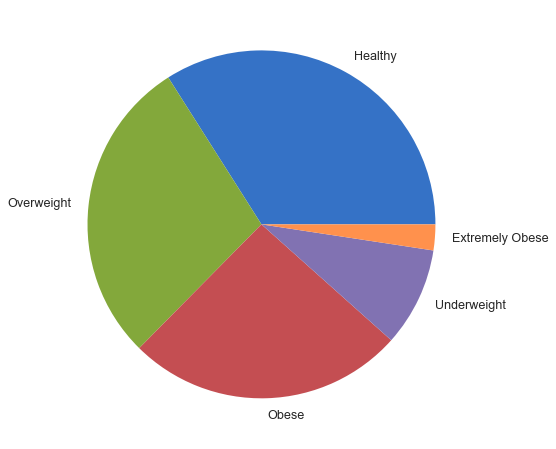

In [32]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.pie(classes, labels = classes.index);

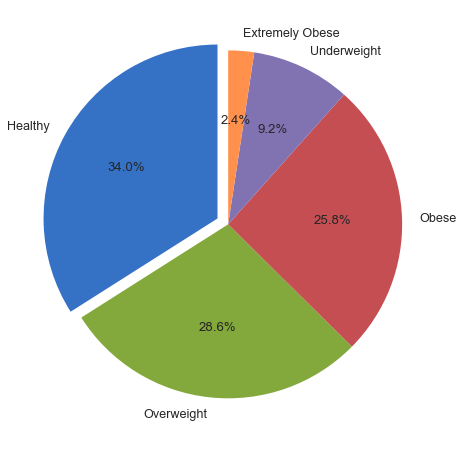

In [33]:
fig, ax = plt.subplots(figsize = (8, 8))

explode = [0.07, 0, 0, 0, 0]
ax.pie(classes, labels = classes.index, explode = explode,
       startangle = 90, autopct = '%1.1f%%');

In [34]:
name = 'Dani'
'My name is %s' % name #'My name is {}'.format(name)

'My name is Dani'

In [35]:
number = 30.256654
'The number is %s' % number

'The number is 30.256654'

In [36]:
number = 30.256654
'%1.2f%%' % number

'30.26%'

<hr>
<h1>Outliers</h1>

In [37]:
lol = pd.read_csv('..\\data\\high_diamond_ranked_10min.csv')

In [38]:
lol.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [39]:
lol.tail()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8
9878,4523772935,1,18,0,1,6,6,5,0,0,...,0,15339,6.8,17379,201,46,-927,58,20.1,1533.9


In [40]:
lol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [41]:
lol.corr()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,1.000000,0.000985,0.005361,-0.012057,-0.011577,-0.038993,-0.013160,-0.023329,0.016599,0.008962,...,0.003557,-0.010622,-0.012419,-0.021187,-0.005118,0.006040,0.014670,0.012315,-0.005118,-0.010622
blueWins,0.000985,1.000000,0.000087,0.044247,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,...,-0.103696,-0.411396,-0.352127,-0.387588,-0.212171,-0.110994,-0.511119,-0.489558,-0.212171,-0.411396
blueWardsPlaced,0.005361,0.000087,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,...,-0.008225,-0.005685,-0.008882,-0.013000,-0.012395,0.001224,-0.015800,-0.027943,-0.012395,-0.005685
blueWardsDestroyed,-0.012057,0.044247,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,...,-0.023943,-0.067467,-0.059090,-0.057314,0.040023,-0.035732,-0.078585,-0.077946,0.040023,-0.067467
blueFirstBlood,-0.011577,0.201769,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,...,-0.069584,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.378511,-0.240665,-0.156711,-0.301479
blueKills,-0.038993,0.337358,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,...,-0.082491,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.654148,-0.583730,-0.472203,-0.161127
blueDeaths,-0.013160,-0.339297,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,...,0.156780,0.885728,0.433383,0.464584,-0.040521,-0.100271,0.640000,0.577613,-0.040521,0.885728
blueAssists,-0.023329,0.276685,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,...,-0.060880,-0.133948,-0.356928,-0.396652,-0.337515,-0.160915,-0.549761,-0.437002,-0.337515,-0.133948
blueEliteMonsters,0.016599,0.221944,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,...,-0.052029,-0.216616,-0.169649,-0.189816,-0.074838,-0.087893,-0.281464,-0.263991,-0.074838,-0.216616
blueDragons,0.008962,0.213768,0.017676,0.040504,0.134309,0.170436,-0.188852,0.170873,0.781039,1.000000,...,-0.032865,-0.192871,-0.149806,-0.159485,-0.059803,-0.098446,-0.233875,-0.211496,-0.059803,-0.192871


<AxesSubplot:>

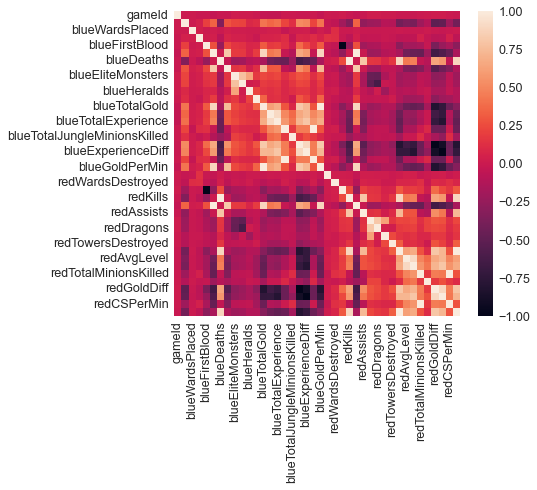

In [42]:
sns.heatmap(lol.corr())

In [43]:
columns = ['blueTotalGold', 'redTotalGold', 'blueTotalExperience', 'redTotalExperience']
lol = lol[columns]
lol.head()

,blueTotalGold,redTotalGold,blueTotalExperience,redTotalExperience
0,17210,16567,17039,17047
1,14712,17620,16265,17438
2,16113,17285,16221,17254
3,15157,16478,17954,17961
4,16400,17404,18543,18313


In [44]:
lol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   blueTotalGold        9879 non-null   int64
 1   redTotalGold         9879 non-null   int64
 2   blueTotalExperience  9879 non-null   int64
 3   redTotalExperience   9879 non-null   int64
dtypes: int64(4)
memory usage: 308.8 KB


In [45]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [46]:
for i in np.arange(5):
    print(i)

0
1
2
3
4


In [47]:
np.arange(9).reshape(3, 3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [48]:
for i in np.arange(9).reshape(3, 3).flat:
    print(type(i))

<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int32'>


numpy.ndarray

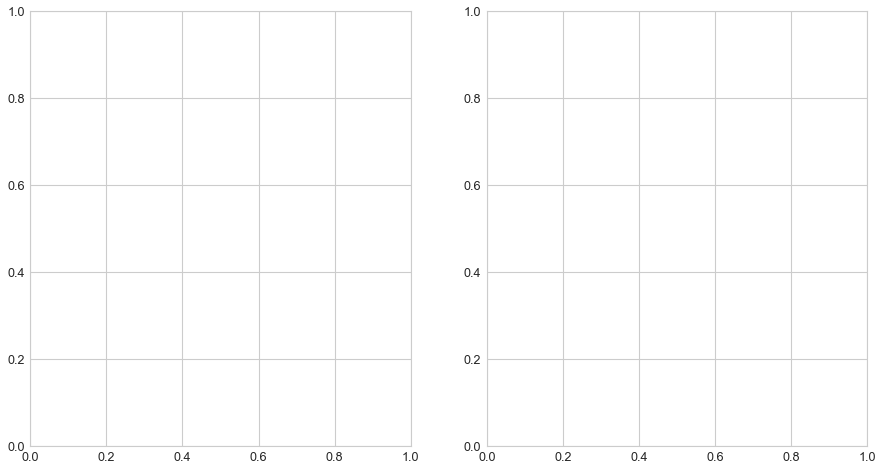

In [49]:
fig, axs = plt.subplots(1, 2, figsize = (15, 8))
type(axs)

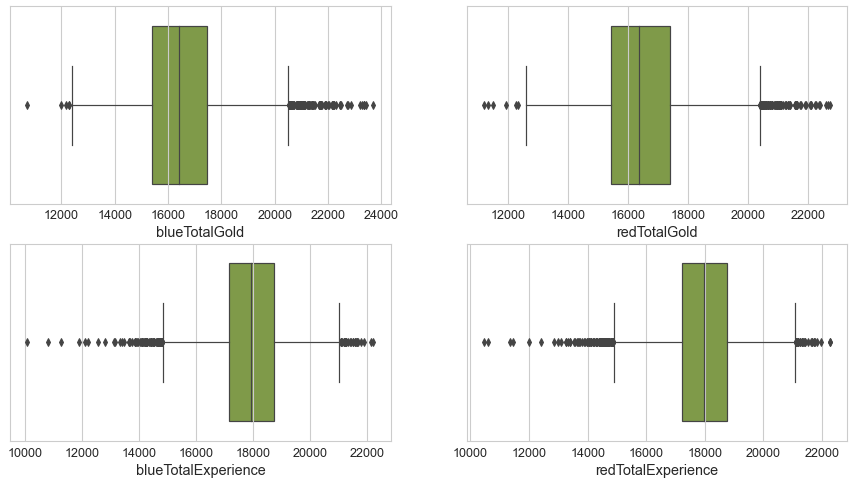

In [50]:
fig, axs = plt.subplots(2, 2, figsize = (15, 8))


for i, ax in enumerate(axs.flat):
    sns.boxplot(data = lol, x = lol.columns[i], ax = ax, color = 'g')

In [51]:
dir(axs[0, 0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_clipon',
 '_clippath',
 '_colorbars',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_axis_map',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',

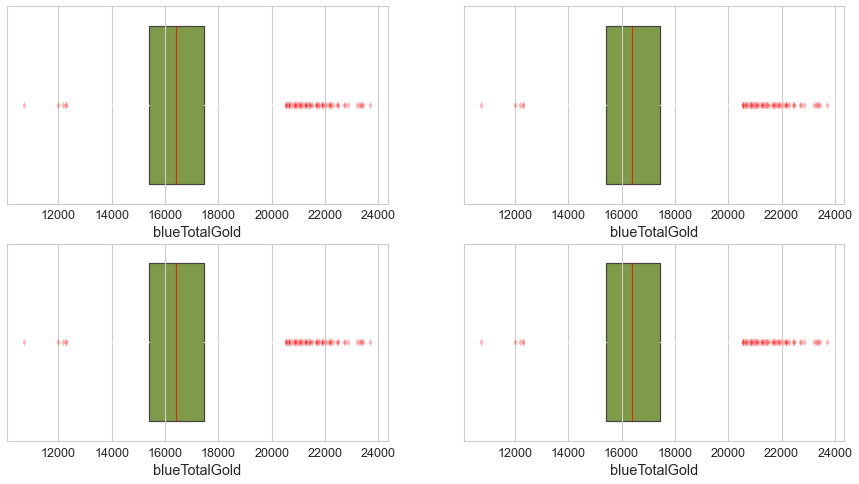

In [52]:
fig, axs = plt.subplots(2, 2, figsize = (15, 8))

index = 0
for ax in axs.flat:
    sns.boxplot(data = lol, x = lol.columns[index], ax = ax, color = 'g')
    
    ax.get_lines()[0].set_color('White') 
    ax.get_lines()[1].set_color('White')
    ax.get_lines()[2].set_color('White')
    ax.get_lines()[3].set_color('White')
    ax.get_lines()[4].set_color('Red')
    ax.get_lines()[4].set_alpha(0.7)
    ax.get_lines()[5].set_markerfacecolor('Red')
    ax.get_lines()[5].set_alpha(0.3)
    ax.get_lines()[5].set_markeredgecolor('White')

In [53]:
def box_plots(data):
    
    fig, axs = plt.subplots(2, 2, figsize = (15, 8))

    index = 0
    for ax in axs.flat:
        sns.boxplot(data = data, x = data.columns[index], ax = ax, color = 'g')


        ax.get_lines()[4].set_color('Red')
        ax.get_lines()[4].set_alpha(0.7)
        ax.get_lines()[5].set_markerfacecolor('Red')
        ax.get_lines()[5].set_alpha(0.3)

<hr>
<h2>Z - Score</h2>

In [54]:
outliers = dp.Outliers()

In [ ]:
data_clean, index = outliers.fit(lol, how = 'zscore', verbose = True)

In [ ]:
data_clean.head()

In [ ]:
data_clean.tail()

In [ ]:
lol.info()

In [ ]:
data_clean.info()

In [ ]:
lol.loc[index]

In [ ]:
box_plots(data_clean)

<hr>
<h2>Modified Z - Score</h2>

In [ ]:
outliers = dp.Outliers()

In [ ]:
data_clean, index = outliers.fit(lol, how = 'mzscore', verbose = True)

In [ ]:
data_clean.head()

In [ ]:
data_clean.tail()

In [ ]:
box_plots(data_clean)

In [ ]:
box_plots(lol)

<hr>
<h2>Data Trimming</h2>

In [ ]:
outliers = dp.Outliers()

In [ ]:
data_clean, index = outliers.fit(lol, how = 'trimming', verbose = True)

In [ ]:
data_clean.head()

In [ ]:
data_clean.tail()

In [ ]:
box_plots(data_clean)

<hr>
<h2>IQR</h2>

In [ ]:
outliers = dp.Outliers()

In [ ]:
data_clean, index = outliers.fit(lol, how = 'iqr', verbose = True)

In [ ]:
data_clean.head()

In [ ]:
data_clean.tail()

In [ ]:
box_plots(data_clean)

In [ ]:
index

In [ ]:
dic = {'x' : [1, 2, 3, 4], 'y' : [4, 3, 2, 1]}
pd.DataFrame(dic)

In [ ]:
class Outliers:
    """
    This class focuses on the detection of outliers in a given data set. Use 4 methods
    for this that are listed below:
    
    Z-Score
    -------
        This method uses the following transformation to detect outliers:
        
                                  Z = (x - mean) / std
                                  
        Where mean is the mean of the data and std is its standard deviation, if Z is greater
        or lower than a certain threshold (usually 3), this point is considered an outlier.
        
        This implementation is iterative, once the outliers are detected, the transformation 
        is applied again and outliers are searched again, the process ends when no point 
        exceeds the threshold.
        
        
    Modified Z-Score
    ----------------
        This method is very similar to the Z-Score but uses a different transformation:
                                  
                                  Z = Q(75) * (x - median) / MAD
                                  
        Where Q (75) is the 75th percentile of a standard normal distribution, median is 
        the median of the data, and MAD is the absolute deviation from the median defined as 
        follows:
                                 
                                  MAD = median(|x - median|)
        
        The implementation after transformation is the same as for Z-Score method.
        
    Interquartile Range
    --------------------
        Use the interquartile range (iqr) to detect outliers:
        
                                  iqr = Q3 - Q1
        
        Where Q1 and Q3 are the first and third quartiles respectively. If a value is 
        1.5 * iqr greater than Q3 or 1.5 * iqr less than Q1 it is considered an outlier.
    
    
    Data Trimming
    -------------
        It considers outliers to the k most extreme values or to the k% of the most extreme
        data.
        
        
    ----------
    Attributes
    ----------
    
    multidim → bool
        Read-only property, indicates whether the analysis performed is multidimensional 
        or not.
        
    data → DataFrame
        The data on which the analysis was performed. Always will be a data frame even if 
        the analysis is one-dimensional.
        
    -------
    Methods
    -------
    
    fit
        Runs outlier detection on the provided data. Check the method's documentation for 
        information of the parameters.
    """
    def __init__(self, data = None):
        if isinstance(data, pd.DataFrame):
            self._multidim = len(data.columns) > 1
            self.data      = data
            
        else:
            data = pd.DataFrame(data)
            self._multidim = len(data.columns) > 1
            self.data      = data
            
        
    #Only read Property multi_dim_________________________________________________________________
    def get_multidim(self):
        return self._multidim
    
    multidim = property(fget = get_multidim)
    
    #Data property _______________________________________________________________________________
    def get_data(self):
        return self._data
    
    def set_data(self, data):
        if isinstance(data, pd.DataFrame):
            self._data = data      
        else:
            raise ValueError('The Data must be a Pandas DataFrame')
            
    data = property(fget = get_data, fset = set_data)
            
            
    #mean distances for multivariable z-score______________________________________________________
    def _mean_distances(self):
        mean = self.data.mean()
        distances = [np.linalg.norm(row - mean) for row in self.data.values]
        
        return pd.Series(distances)
    
    
    #MAD for the Modified Z-score__________________________________________________________________
    def _mad(self, data):
        median = data.median()
        return np.abs(data - median).median()
    
    #z-score method______________________________________________________________________________
    def _z_score(self, data, threshold = 3.0, verbose = False): #only one dimentional method
        data = data.copy()
        outliers = []
        
        while True:
            
            #apply the transform
            mean = data.mean()
            std  = data.std(ddof = 1)
            data_z = (data - mean) / std
            
            to_remove = abs(data_z) > threshold#check for the outliers
            
            if to_remove.values.sum() == 0:
                break   
            else:
                data[to_remove] = np.nan
                outliers.extend(np.where(to_remove)[0])#add current indexes to list
        
        
        if verbose:
            print('{} outliers were found'.format(len(outliers)))
        
        return data, outliers
        
    #Modified z-score method______________________________________________________________________________   
    def _modified_z_score(self, data, threshold = 3.0, verbose = False):#only one dimentional method
        data = data.copy()
        outliers = []
        
        while True:
            #apply the transform
            median = data.median()
            mad  = self._mad(data)
            data_z = (stats.norm.ppf(.75) / mad) * (data - median) 
            
            to_remove = abs(data_z) > threshold#check for the outliers
            
            if to_remove.values.sum() == 0:
                break
            else:
                data[to_remove] = np.nan
                outliers.extend(np.where(to_remove)[0])#add current indexes to list
                
        if verbose:
            print('{} outliers were found'.format(len(outliers)))
        
        return data, np.array(outliers)
        
        
        
    #Data Trimming_________________________________________________________________________________
    def _data_trimming(self, data, verbose = False, k = 5, percentage = True, impute = 'none'):
        data = data.copy()
        
        if percentage:
            data_cut_off = data.quantile(1 - (k / 100))
            data_2_cut = np.where(np.abs(data) > data_cut_off)[0]
            
        else:
            data_sort_idx = np.argsort(np.abs(data))[::-1]
            data_2_cut = data_sort_idx[:k]
        
        #imputation
        if impute.lower() != 'none' and impute in ('median', 'mean', 'extremes'):
            
            if impute == 'median':
                data[data_2_cut] = data.median()
            
            elif impute == 'mean':
                data[data_2_cut] = data.mean()
                
        elif impute.lower() == 'none':
            data[data_2_cut] = np.nan
            
        else:
            raise ValueError('{} it is not recognized as a valid imputation method'.format(impute))
        
        if verbose:
            print('{} outliers were found'.format(len(data_2_cut)))
        
        return data, data_2_cut
        
        
    #interquartile range method___________________________________________________________________
    def _interquartile_range_method(self, data: 'DataFrame',
                                    verbose = False, impute= 'none'):
        data = data.copy()
        
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr
        
        outliers = (data > upper_limit) | (data < lower_limit)#check for the outliers
        
        #imputation
        if impute.lower() != 'none' and impute in ('median', 'mean', 'extremes'):
            
            if impute == 'median':
                data[outliers] = data.median()
            
            elif impute == 'mean':
                data[outliers] = data.mean()
                
            elif impute == 'extremes':
                data[data > upper_limit] = upper_limit
                data[data < lower_limit] = lower_limit
                
        elif impute.lower() == 'none':
            data[outliers] = np.nan
            
        else:
            raise ValueError('{} it is not recognized as a valid imputation method'.format(impute))
        
        #convert to indices here, before is a boolean mask  
        outliers = np.where(outliers)[0]
        
        if verbose:
            print('{} outliers were found'.format(len(outliers)))
        
        return data, outliers
        
    
    #fit method______________________________________________________________________________________
    def fit(self, data = None,
            how: str = 'iqr',
            impute: str = 'none',
            verbose: bool = False,
            threshold: float = 3.0,
            percentage: bool = True, k: int = 5) -> '(data, outliers)':
        """
        Executes the outlier detection method according to the how parameter,
        returns a copy of the data without outliers and an array with the 
        indices of the outliers.
        
        
        Arguments
        ---------
        
        data = None → DataFrame, Series, Array or list
            The data to detect outliers, it is not necessary if it was provided
            when creating the instance.
            
        how = 'iqr' → str
            The detection method to be used, accepts the following options:
                'iqr'      → For the interquartile range method.
                'zscore'   → For the Z-Score method.
                'mzscore'  → For the Modified Z_Score method.
                'trimming' → For the data trimming method.
                
        impute = 'none' → str
            The way you want to impute outliers, accepts the following options:
                'none'     → It does not impute the outliers, it changes them to NaN's.
                'mean'     → Imputes the value of the mean of the data to the outliers.
                'median'   → Imputes the value of the median of the data to the outliers.
                'extremes' → Only for the interquartile range method. Imputes the value
                             of the closest limit (lower or upper) to the outliers.
           
        verbose = False → bool
            Prints the number of outliers founds.
             
        threshold = 3.0 → float
            The threshold for the Z-Score and Modified Z-Score methods.
        
        percentage = True → bool
            Specifies if you want to follow the criteria of percentage or specific number
            in the data trimming method.
        
        k = 5 → int
            The percentage of the data or the number of outliers considered for the data
            trimming method.
        """
        if isinstance(data, pd.DataFrame):#check the data
            self._multidim = len(data.columns) > 1
            self.data      = data
            
        else:
            data = pd.DataFrame(data)
            self._multidim = len(data.columns) > 1
            self.data      = data
        
        #iqr method_________________________________________________________________________________
        if how == 'iqr':
            data_new = {}.fromkeys(self.data.columns)
            outliers = {}.fromkeys(self.data.columns)

            for k in data_new.keys():
                data_new[k], outliers[k] = self._interquartile_range_method(self.data[k],
                                                                           verbose = verbose,
                                                                           impute = impute)

            return pd.DataFrame(data_new), outliers
        
        #z-score____________________________________________________________________________________
        elif how == 'zscore':
            
            if self.multidim:#multidimentional case
                data = self.data.copy()
                distances = self._mean_distances()
                #keep only the outlier's index
                outliers = self._z_score(distances, threshold = threshold, verbose = verbose)[1]
                
                #imputation
                if impute == 'none':
                    data.iloc[outliers] = np.nan
                    return data, outliers

                elif impute == 'mean':
                    for c in data.columns:
                        data[c][outliers] = data[c].mean()
                        
                    return data, outliers

                elif impute == 'median':
                    for c in data.columns:
                        data[c][outliers] = data[c].median()

                    return data, outliers
                
                else:
                    msn = '{} it is not recognized as a valid imputation method'
                    raise ValueError(msn.format(impute))

            #one dimentional case________________________________________________________________
            else:
                if impute == 'none':
                    return self._z_score(self.data, verbose)

                elif impute == 'mean':
                    data, outliers = self._z_score(self.data, threshold = threshold, verbose = verbose)
                    data.iloc[outliers] = data.mean()[0]
                    return data, outliers

                elif impute == 'median':
                    data, outliers = self._z_score(self.data, threshold = threshold, verbose = verbose)
                    data.iloc[outliers] = data.median()[0]
                    return data, outliers

                else:
                    raise ValueError('{} it is not recognized as a valid imputation method'.format(impute))


        #modified z-score____________________________________________________________________________
        elif how == 'mzscore':
               
            #multidimentional case
            if self.multidim:
                data = self.data.copy()
                distances = self._mean_distances()
                #keep only the outlier's index
                outliers = self._modified_z_score(distances, threshold = threshold, 
                                                  verbose = verbose)[1]
                
                #imputation
                if impute == 'none':
                    data.iloc[outliers] = np.nan
                    return data, outliers

                elif impute == 'mean':
                    for c in data.columns:
                        data[c][outliers] = data[c].mean()

                    return data, outliers

                elif impute == 'median':
                    for c in data.columns:
                        data[c][outliers] = data[c].median()

                    return data, outliers

                else:
                    msn = '{} it is not recognized as a valid imputation method'
                    raise ValueError(msn.format(impute))

            #one dimentional case________________________________________________________________
            else:
                if impute == 'none':
                    return self._modified_z_score(self.data, verbose)

                elif impute == 'mean':
                    data, outliers = self._modified_z_score(self.data, threshold = threshold,
                                         verbose = verbose)
                    data.iloc[outliers] = data.mean()[0]
                    return data, outliers

                elif impute == 'median':
                    data, outliers = self._modified_z_score(self.data, threshold = threshold,
                                         verbose = verbose)
                    data.iloc[outliers] = data.median()[0]
                    return data, outliers
                
                else:
                    msn = '{} it is not recognized as a valid imputation method'
                    raise ValueError(msn.format(impute))

        #data trimming________________________________________________________________________________
        elif how == 'trimming':
            data_new = {}.fromkeys(self.data.columns)
            outliers = {}.fromkeys(self.data.columns)

            for c in data_new.keys():
                data_new[c], outliers[c] = self._data_trimming(self.data[c], k = k, verbose = verbose,
                                                               percentage = percentage,
                                                               impute = impute)
            return pd.DataFrame(data_new), outliers
    